In [1]:
import sys

In [2]:
sys.dont_write_bytecode = True

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle

from PoissonMixtureModel import PoissonMixtureModel

In [4]:
np.random.seed(0)

In [5]:
N = 5000

print(f'Número de Observações: {N}')

Número de Observações: 5000


In [6]:
M = 3

print(f'Número de Categorias Latentes: {M}')

Número de Categorias Latentes: 3


In [7]:
PI = np.array([1/4, 1/4, 1/2])

print(f'Distribuição das Categorias Latentes:\n')

print(PI)

Distribuição das Categorias Latentes:

[0.25 0.25 0.5 ]


In [8]:
ALPHA = np.random.multinomial(n = 1, pvals = PI, size = N).sum(axis = 0)

print(f'Número de Observações por Categoria Latente:\n')

print(ALPHA)

Número de Observações por Categoria Latente:

[1217 1231 2552]


In [9]:
MU = [1, 10, 20]

print(f'Médias por Categoria Latente:\n')

print(MU)

Médias por Categoria Latente:

[1, 10, 20]


In [10]:
X, Z = [], []

for m in range(M):

    X.append(

        np.random.poisson(

            lam = MU[m],

            size = ALPHA[m]

        )

    )

    Z.append(

        np.repeat(

            m,

            repeats = ALPHA[m]

        )

    )

X, Z = np.hstack(X), np.hstack(Z)

X, Z = shuffle(X, Z)

In [11]:
print('Observações:\n')

print(X)

Observações:

[ 2 19  0 ... 10 19 17]


In [12]:
print('Categorias Latentes:\n')

print(Z)

Categorias Latentes:

[0 2 0 ... 1 2 2]


In [13]:
DATA = pd.DataFrame(data = {'Observação': X, 'Categoria Latente': Z})

DATA.head()

,Observação,Categoria Latente
0,2,0
1,19,2
2,0,0
3,17,2
4,3,0


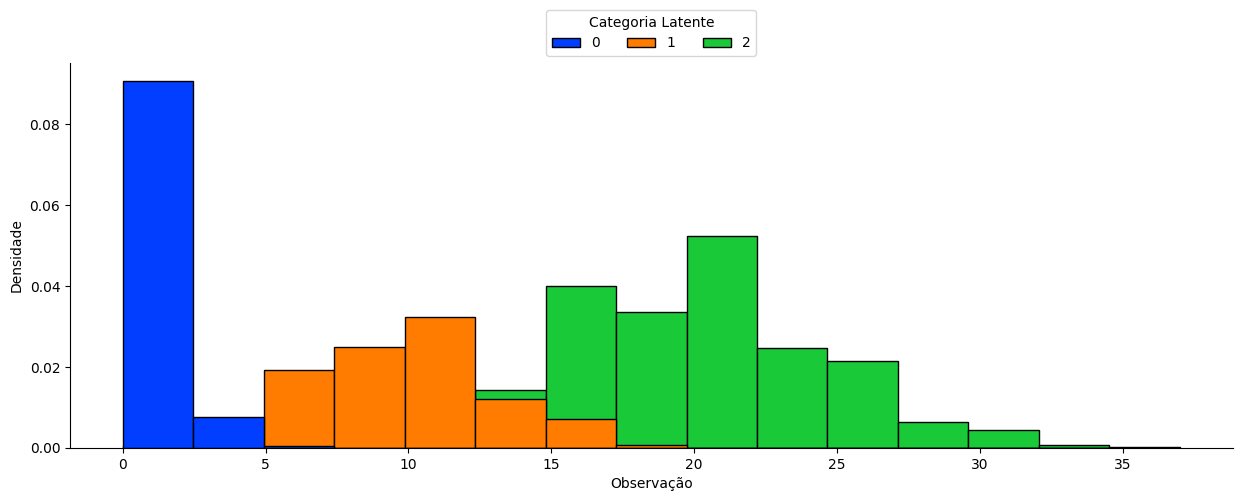

In [14]:
plt.figure(figsize = (15, 5))

GRAPHIC = sns.histplot(

    data = DATA, x = 'Observação', 
    
    hue = 'Categoria Latente', 
    
    stat = 'density', bins = 15, 
    
    palette = 'bright', alpha = 1

)

GRAPHIC.spines['right'].set_visible(False)

GRAPHIC.spines['top'].set_visible(False)

plt.ylabel('Densidade')

sns.move_legend(

    GRAPHIC, 'lower center',

    bbox_to_anchor = (0.5, 1), ncol = 5
    
)

plt.show()

In [15]:
PMM = PoissonMixtureModel(X = X, M = M)

PMM.update_model()

In [16]:
print(PMM.eta)

[ 9.91650957  0.97961787 20.09551835]


In [17]:
print(np.abs((MU - np.sort(PMM.eta))/MU).max())

0.020382132567719924
